In [12]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

#### Đọc dữ liệu

In [13]:
# Example job categories
jobs = ["doctor", "dentist", "engineer", "teacher", "lawyer", "nurse", "pharmacist", "architect", 
        "chef", "scientist", "musician", "artist", "pilot", "firefighter", "police officer", 
        "accountant", "software developer", "mechanic", "electrician", "plumber", 
        "salesperson", "marketing manager", "graphic designer", "journalist", 
        "data analyst", "psychologist", "biologist", "chemist", "physicist", "economist"]

# Generate random height, weight, and job
data = []
for _ in range(2000):
    height = round(random.uniform(1.5, 2.0), 2)  # height in meters
    weight = round(random.uniform(50, 100), 2)   # weight in kg
    job = random.choice(jobs)
    data.append([height, weight, job])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Height_m', 'Weight_kg', 'Job'])

# Save to CSV
df.to_csv('persons_dataset.csv', index=False)

print("Dataset generated and saved as 'persons_dataset.csv'")


Dataset generated and saved as 'persons_dataset.csv'


In [14]:
df

,Height_m,Weight_kg,Job
0,1.99,62.36,architect
1,1.94,95.17,economist
2,1.79,89.46,graphic designer
3,1.85,54.16,chemist
4,1.92,63.78,software developer
...,...,...,...
1995,1.61,86.77,mechanic
1996,1.89,74.86,pilot
1997,1.76,75.28,teacher
1998,1.69,74.54,lawyer


In [15]:
def calculate_bmi(row):
    weight = row["Weight_kg"]
    height = row["Height_m"]
    return  weight / (height ** 2)

def assign_bmi(row):
    bmi = row["bmi"]
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal weight"
    return "Overweight"

df["bmi"] = df.apply(calculate_bmi, axis = 1)
df["bmi_category"] = df.apply(assign_bmi, axis = 1)
df

,Height_m,Weight_kg,Job,bmi,bmi_category
0,1.99,62.36,architect,15.747077,Underweight
1,1.94,95.17,economist,25.286959,Overweight
2,1.79,89.46,graphic designer,27.920477,Overweight
3,1.85,54.16,chemist,15.824690,Underweight
4,1.92,63.78,software developer,17.301432,Underweight
...,...,...,...,...,...
1995,1.61,86.77,mechanic,33.474789,Overweight
1996,1.89,74.86,pilot,20.956860,Normal weight
1997,1.76,75.28,teacher,24.302686,Normal weight
1998,1.69,74.54,lawyer,26.098526,Overweight


#### Vẽ biểu đồ để xem phân phối của dữ liệu

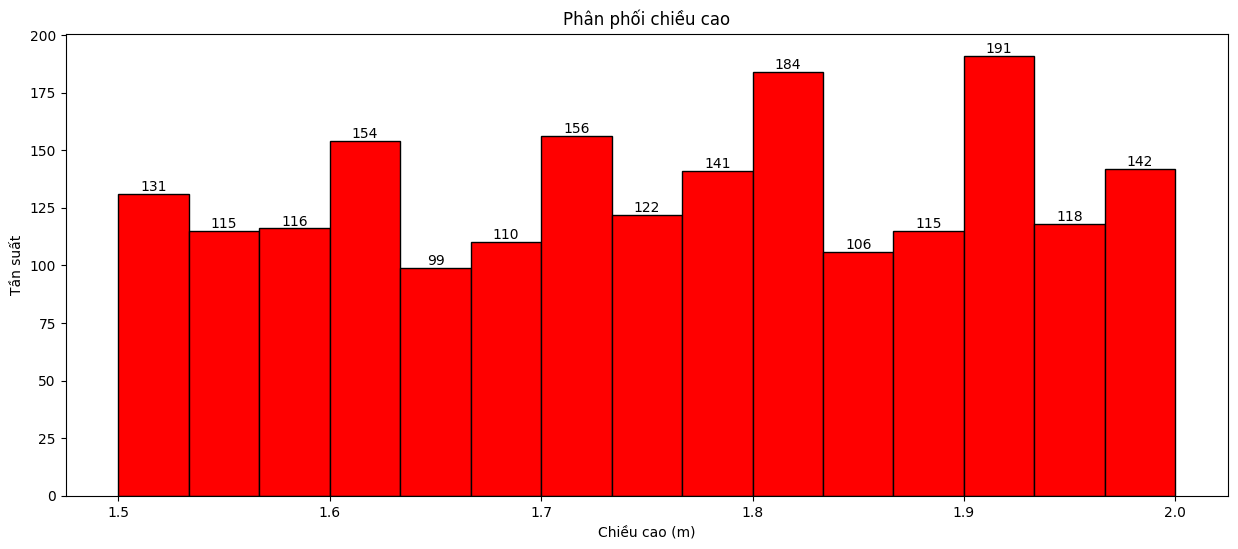

In [16]:
plt.figure(figsize=(15,6))
n, bins, patches = plt.hist(df["Height_m"], bins=15, color='red', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối chiều cao')
plt.xlabel('Chiều cao (m)')
plt.ylabel('Tần suất')

# Hiển thị số trên các cột
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), int(n[i]), 
             ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

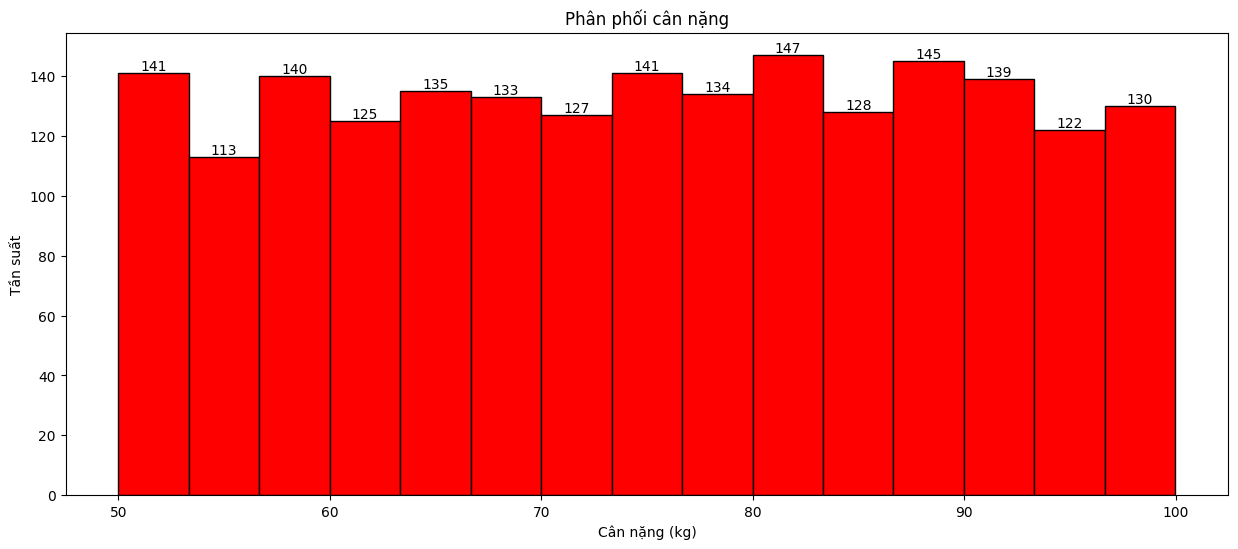

In [17]:
plt.figure(figsize=(15,6))
n, bins, patches = plt.hist(df["Weight_kg"], bins=15, color='red', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối cân nặng')
plt.xlabel('Cân nặng (kg)')
plt.ylabel('Tần suất')

# Hiển thị số trên các cột
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), int(n[i]), 
             ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

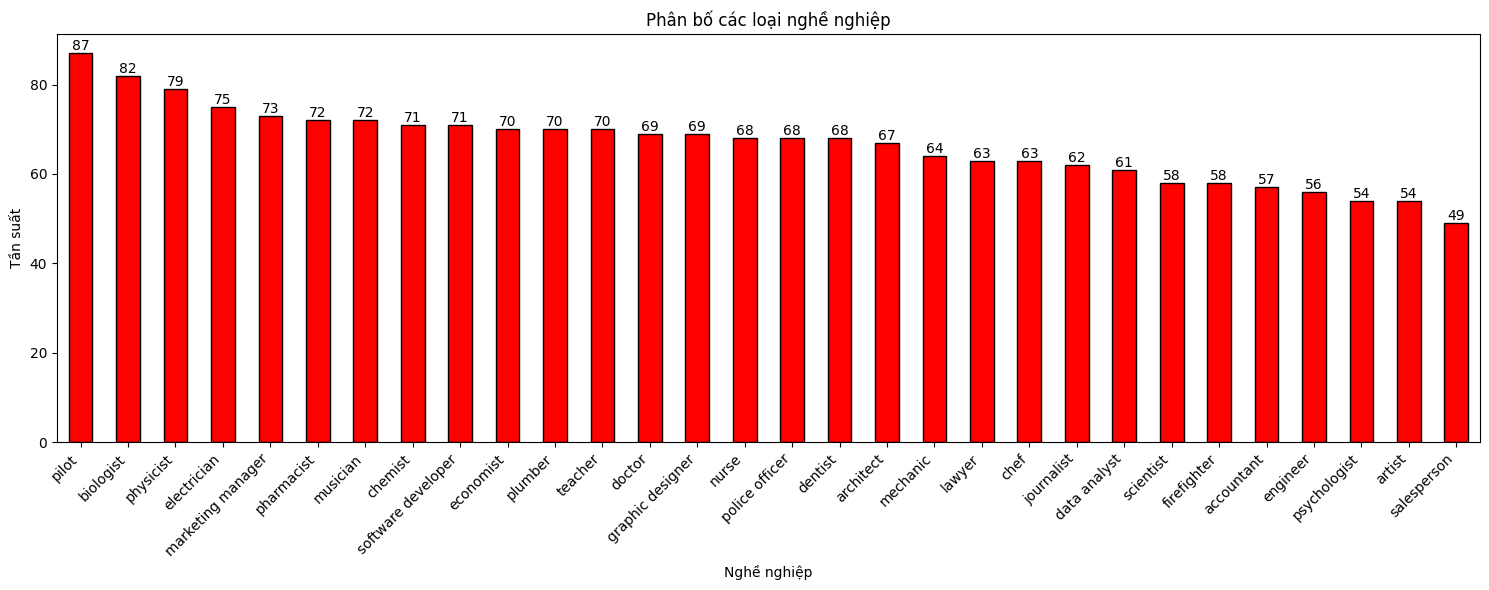

In [18]:
job_counts = df['Job'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 6))
bars = job_counts.plot(kind='bar', color='red', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân bố các loại nghề nghiệp')
plt.xlabel('Nghề nghiệp')
plt.ylabel('Tần suất')

# Hiển thị số trên các cột
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
             ha='center', va='bottom')

# Hiển thị biểu đồ
plt.xticks(rotation=45, ha='right')  # Xoay nhãn cho dễ nhìn
plt.tight_layout()
plt.show()

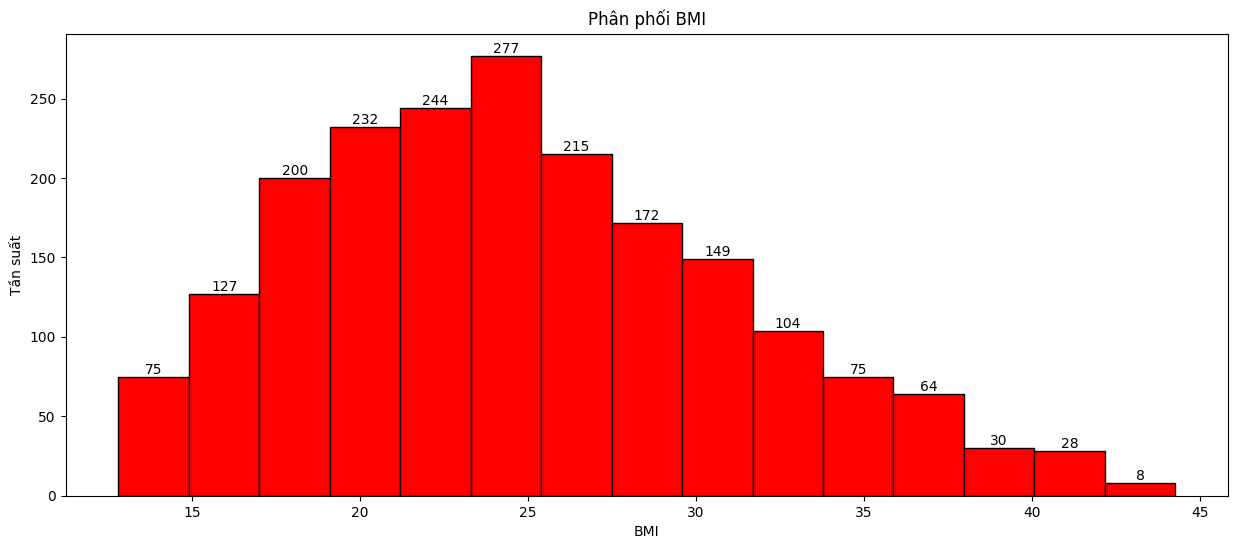

In [19]:
plt.figure(figsize=(15,6))
n, bins, patches = plt.hist(df["bmi"], bins=15, color='red', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối BMI')
plt.xlabel('BMI')
plt.ylabel('Tần suất')

# Hiển thị số trên các cột
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), int(n[i]), 
             ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

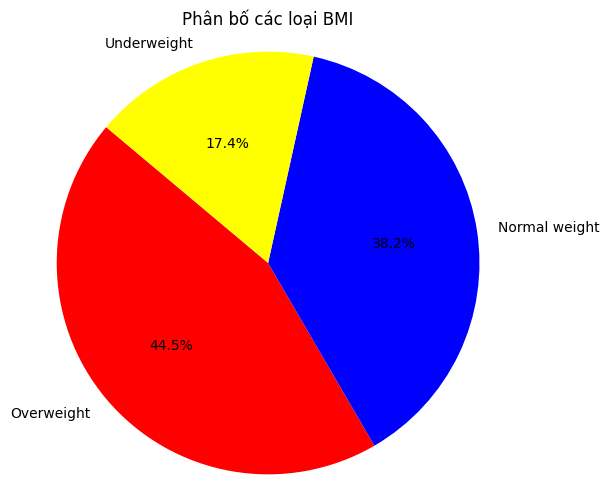

In [20]:
# Tính toán tần suất của các loại BMI
bmi_counts = df['bmi_category'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6,6))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, colors=['red','blue','yellow'])
plt.title('Phân bố các loại BMI')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

#### Huấn luyện mô hình

In [21]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

##### Trích chọn đặc trưng

In [22]:
df["Job_encode"] = LabelEncoder().fit_transform(df["Job"])
df

,Height_m,Weight_kg,Job,bmi,bmi_category,Job_encode
0,1.99,62.36,architect,15.747077,Underweight,1
1,1.94,95.17,economist,25.286959,Overweight,9
2,1.79,89.46,graphic designer,27.920477,Overweight,13
3,1.85,54.16,chemist,15.824690,Underweight,5
4,1.92,63.78,software developer,17.301432,Underweight,28
...,...,...,...,...,...,...
1995,1.61,86.77,mechanic,33.474789,Overweight,17
1996,1.89,74.86,pilot,20.956860,Normal weight,22
1997,1.76,75.28,teacher,24.302686,Normal weight,29
1998,1.69,74.54,lawyer,26.098526,Overweight,15


In [23]:
X = df[["Height_m", "Job_encode"]]
y = df["Weight_kg"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

##### Chuẩn hóa dữ liệu

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Mô hình Linear Regression

In [26]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
mape_lr = mean_absolute_percentage_error(y_test, y_pred)


In [27]:
X_train_dl = X_train.astype(np.float32)

##### Mô hình CNN

In [28]:
import tensorflow as tf
import numpy as np

# Mô hình CNN với tf.Module
class CNNModel(tf.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = tf.Variable(tf.random.normal([1, 1, 1, 32]), name='conv1_weights', dtype=tf.float32)  # Lớp Conv2D với 32 filters
        self.dense1 = tf.Variable(tf.random.normal([64, 64]), name='dense1_weights', dtype=tf.float32)  # Fully connected layer 1
        self.dense2 = tf.Variable(tf.random.normal([64, 1]), name='dense2_weights', dtype=tf.float32)   # Fully connected layer 2

    def __call__(self, x):
        x = tf.reshape(x, [-1, 2, 1, 1])  # Reshape input thành [batch_size, height=2, width=1, channels=1]
        conv = tf.nn.conv2d(x, self.conv1, strides=[1, 1, 1, 1], padding="VALID")
        conv = tf.nn.relu(conv)  # Activation ReLU
        conv_flat = tf.reshape(conv, [-1, 64])  # Flatten
        dense1_out = tf.matmul(conv_flat, self.dense1)
        dense1_out = tf.nn.relu(dense1_out)  # Activation ReLU
        output = tf.matmul(dense1_out, self.dense2)  # Output layer
        return output

# Khởi tạo mô hình
model = CNNModel()

# Hàm mất mát (loss function)
loss_fn = tf.losses.MeanSquaredError()

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Hàm huấn luyện một batch
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Hàm tính toán loss trên tập test
@tf.function
def test_loss(X, y):
    predictions = model(X)
    loss = loss_fn(y, predictions)
    return loss

X_train_dl = X_train.astype(np.float32)
y_train_dl = y_train.values.astype(np.float32)
X_test_dl = X_test.astype(np.float32)
y_test_dl = y_test.values.astype(np.float32)

# Store loss values
loss_values = []
test_loss_values = []

# Huấn luyện mô hình
epochs = 500
batch_size = 32
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i+batch_size]
        y_batch = y_train_dl[i:i+batch_size]
        loss = train_step(X_batch, y_batch)
        epoch_loss += loss.numpy()
    
    # Tính toán loss trên tập test
    test_loss_value = test_loss(X_test_dl, y_test_dl).numpy()
    loss_values.append(epoch_loss / (len(X_train_dl) // batch_size))
    test_loss_values.append(test_loss_value)

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / (len(X_train_dl) // batch_size)}, Test Loss: {test_loss_value}')


Epoch 1/500, Loss: 7328.680234375, Test Loss: 5857.697265625
Epoch 2/500, Loss: 4568.57150390625, Test Loss: 3452.568115234375
Epoch 3/500, Loss: 2633.6247875976565, Test Loss: 1912.89599609375
Epoch 4/500, Loss: 1575.2158447265624, Test Loss: 1272.0654296875
Epoch 5/500, Loss: 1216.3909814453125, Test Loss: 1123.881591796875
Epoch 6/500, Loss: 1131.7793273925781, Test Loss: 1080.9798583984375
Epoch 7/500, Loss: 1095.4943151855468, Test Loss: 1048.2291259765625
Epoch 8/500, Loss: 1066.7977319335937, Test Loss: 1019.1317138671875
Epoch 9/500, Loss: 1042.4178845214844, Test Loss: 994.2852172851562
Epoch 10/500, Loss: 1022.0340051269532, Test Loss: 972.938720703125
Epoch 11/500, Loss: 1005.3073596191406, Test Loss: 955.5302124023438
Epoch 12/500, Loss: 991.838876953125, Test Loss: 940.9641723632812
Epoch 13/500, Loss: 980.5768041992187, Test Loss: 928.8505249023438
Epoch 14/500, Loss: 971.0327014160156, Test Loss: 918.7589111328125
Epoch 15/500, Loss: 962.9108679199219, Test Loss: 910.112

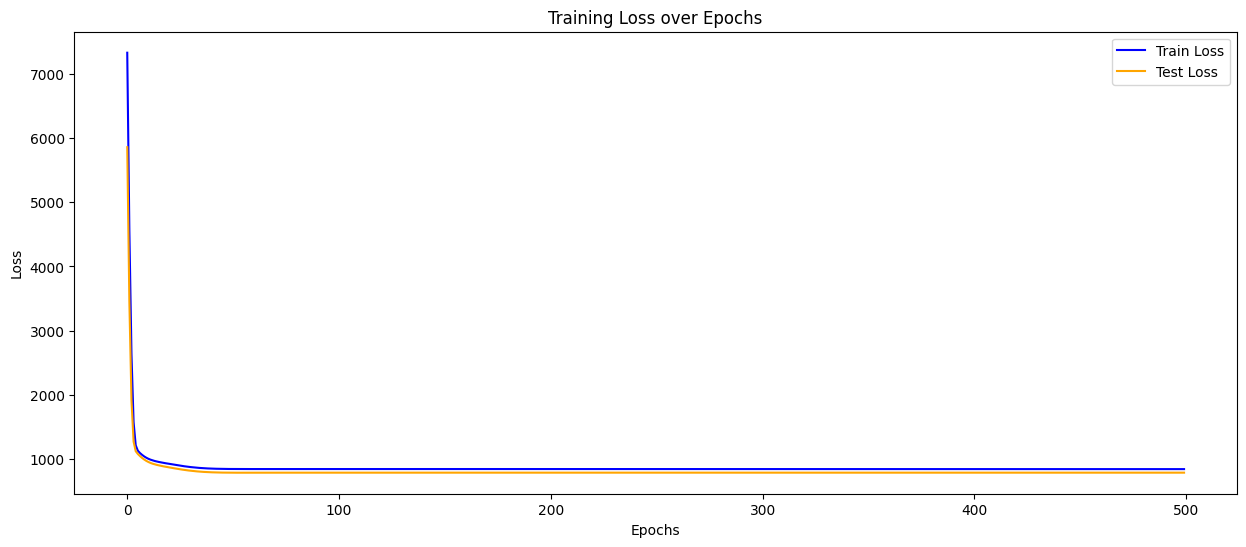

In [29]:
# Plotting the loss over epochs
plt.figure(figsize=(15, 6))
plt.plot(loss_values, label='Train Loss', color='blue')
plt.plot(test_loss_values, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [30]:
y_pred = model(X_test_dl).numpy()

mse_cnn = mean_squared_error(y_test_dl, y_pred)
mae_cnn = mean_absolute_error(y_test_dl, y_pred)
mape_cnn = mean_absolute_percentage_error(y_test_dl, y_pred)


##### Mô hình RNN

In [31]:
import tensorflow as tf
import numpy as np

class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        self.hidden_size = hidden_size
        self.Wxh = tf.Variable(tf.random.normal([input_size, hidden_size]), name='Wxh')
        self.Whh = tf.Variable(tf.random.normal([hidden_size, hidden_size]), name='Whh')
        self.bh = tf.Variable(tf.zeros([hidden_size]), name='bh')
        self.Why = tf.Variable(tf.random.normal([hidden_size, 1]), name='Why')
        self.by = tf.Variable(tf.zeros([1]), name='by')

    def step(self, x, h):
        h = tf.tanh(tf.matmul(x, self.Wxh) + tf.matmul(h, self.Whh) + self.bh)
        y = tf.matmul(h, self.Why) + self.by
        return y, h

    def forward(self, x):
        h = tf.zeros([x.shape[0], self.hidden_size])  # Initialize hidden state
        for t in range(x.shape[1]):  # Loop over time steps
            y, h = self.step(x[:, t, :], h)
        return y

    @property
    def trainable_variables(self):
        return [self.Wxh, self.Whh, self.bh, self.Why, self.by]

# Instantiate model
model = SimpleRNN(input_size=2, hidden_size=64)

# Instantiate optimizer
optimizer = tf.optimizers.Adam()

# Loss function
loss_fn = tf.losses.MeanSquaredError()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model.forward(x)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Function to calculate test loss
@tf.function
def test_loss(x, y):
    predictions = model.forward(x)
    loss = loss_fn(y, predictions)
    return loss

# Prepare the training and test data
X_train_dl = X_train.astype(np.float32).reshape(-1, 1, 2)
y_train_dl = y_train.values.astype(np.float32)  # Ensure y_train is properly formatted
X_test_dl = X_test.astype(np.float32).reshape(-1, 1, 2)
y_test_dl = y_test.values.astype(np.float32)  # Ensure y_test is properly formatted

loss_values = []
test_loss_values = []

epochs = 500
batch_size = 32
for epoch in range(epochs):
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i + batch_size]
        y_batch = y_train_dl[i:i + batch_size]
        loss = train_step(X_batch, y_batch)
    
    # Calculate test loss
    test_loss_value = test_loss(X_test_dl, y_test_dl).numpy()
    loss_values.append(loss.numpy())
    test_loss_values.append(test_loss_value)
    
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}, Test Loss: {test_loss_value}')


Epoch 1/500, Loss: 4772.8701171875, Test Loss: 4482.40673828125
Epoch 2/500, Loss: 4145.244140625, Test Loss: 3877.6005859375
Epoch 3/500, Loss: 3568.548095703125, Test Loss: 3323.6552734375
Epoch 4/500, Loss: 3040.45068359375, Test Loss: 2818.276123046875
Epoch 5/500, Loss: 2564.16064453125, Test Loss: 2364.424072265625
Epoch 6/500, Loss: 2143.421630859375, Test Loss: 1965.488037109375
Epoch 7/500, Loss: 1779.341552734375, Test Loss: 1622.2618408203125
Epoch 8/500, Loss: 1469.9783935546875, Test Loss: 1332.5911865234375
Epoch 9/500, Loss: 1211.2916259765625, Test Loss: 1092.30810546875
Epoch 10/500, Loss: 998.1071166992188, Test Loss: 896.168701171875
Epoch 11/500, Loss: 824.795166015625, Test Loss: 738.5151977539062
Epoch 12/500, Loss: 685.72216796875, Test Loss: 613.7117919921875
Epoch 13/500, Loss: 575.5418090820312, Test Loss: 516.4302368164062
Epoch 14/500, Loss: 489.3616943359375, Test Loss: 441.80963134765625
Epoch 15/500, Loss: 422.815673828125, Test Loss: 385.5266418457031
Ep

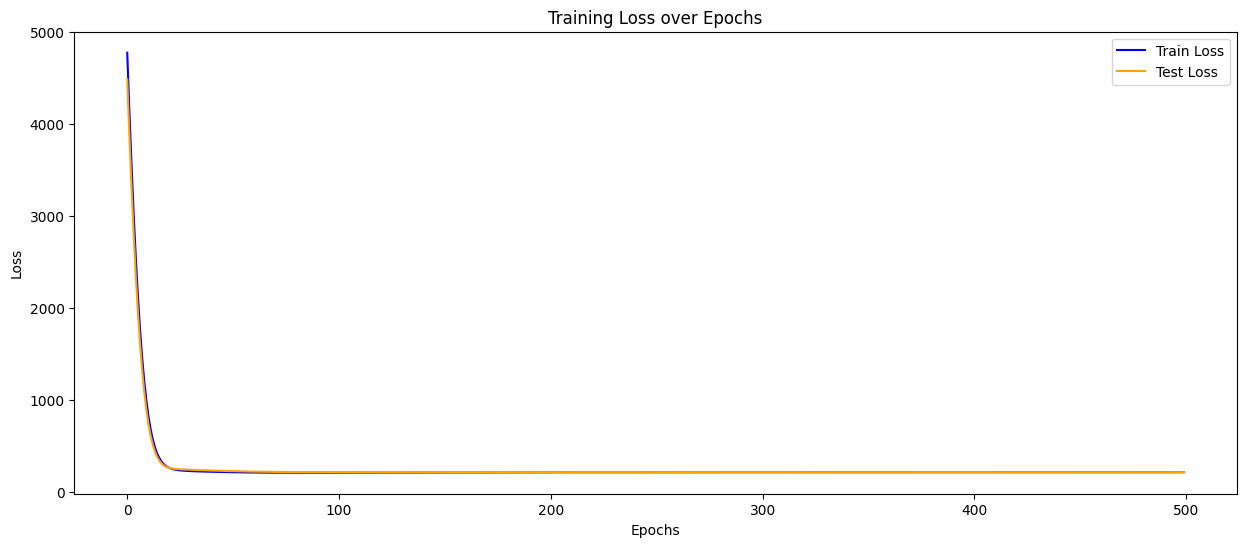

In [32]:
# Plotting the loss over epochs
plt.figure(figsize=(15, 6))
plt.plot(loss_values, label='Train Loss', color='blue')
plt.plot(test_loss_values, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [33]:
y_pred = model.forward(X_test_dl).numpy() 

mse_rnn = mean_squared_error(y_test_dl, y_pred)
mae_rnn = mean_absolute_error(y_test_dl, y_pred)
mape_rnn = mean_absolute_percentage_error(y_test_dl, y_pred)


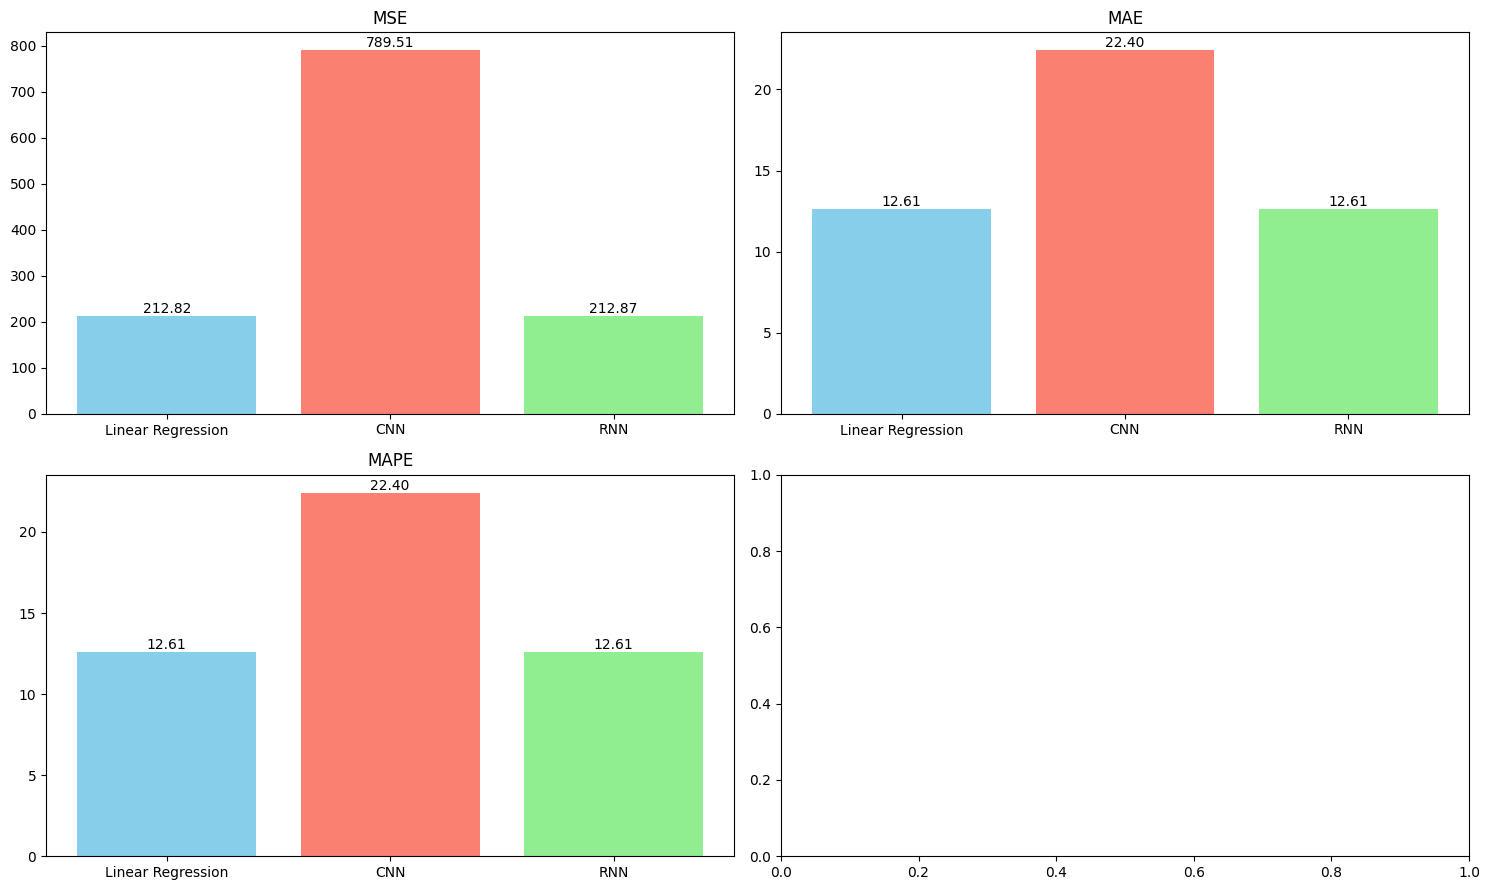

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

bar1 = ax[0][0].bar(['Linear Regression', 'CNN', 'RNN'], [mse_lr, mse_cnn, mse_rnn], color=['skyblue', 'salmon', 'lightgreen'])
ax[0][0].set_title("MSE")
for bar in bar1:
    height = bar.get_height()
    ax[0][0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar2 = ax[0][1].bar(['Linear Regression', 'CNN', 'RNN'], [mae_lr, mae_cnn, mae_rnn], color=['skyblue', 'salmon', 'lightgreen'])
ax[0][1].set_title("MAE")
for bar in bar2:
    height = bar.get_height()
    ax[0][1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

bar3 = ax[1][0].bar(['Linear Regression', 'CNN', 'RNN'], [mae_lr, mae_cnn, mae_rnn], color=['skyblue', 'salmon', 'lightgreen'])
ax[1][0].set_title("MAPE")
for bar in bar3:
    height = bar.get_height()
    ax[1][0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')


plt.tight_layout()
plt.show()